In [26]:
import scienceplots
import matplotlib.pyplot as plt

plt.style.use(['science', 'no-latex'])

In [27]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [28]:
SINGLE_PEERSET_BENCHMARK = "./single_peerset_local_1.csv"
CROSS_PEERSET_BENCHMARK = "./cross_peerset_local_1.csv"

In [29]:
def estimate_gas_price(gas, gas_price=40, eth_price=1800):
    return gas * gas_price * 10**-9 * eth_price

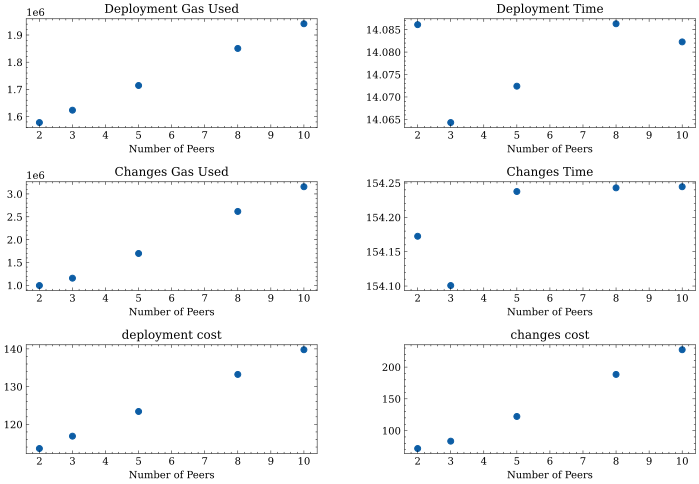

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv(SINGLE_PEERSET_BENCHMARK)
df.columns = [col.strip() for col in df.columns]

# Convert the time columns to floats (in seconds)
df["deployment_time"] = df["deployment_time"].apply(lambda x: float(x[:-1]))
df["changes_time"] = df["changes_time"].apply(lambda x: float(x[:-1]))

# Add columns for deployment and changes cost in USD
gas_price = 40 # gwei
eth_price = 1800 # USD
df['deployment_cost'] = df['deployment_gas_used'] * gas_price * 10**-9 * eth_price
df['changes_cost'] = df['changes_gas_used'] * gas_price * 10**-9 * eth_price


# Plot the variables against the number of peers
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
axs[0, 0].scatter(df["peers_num"], df["deployment_gas_used"])
axs[0, 0].set_title("Deployment Gas Used")
axs[0, 1].scatter(df["peers_num"], df["deployment_time"])
axs[0, 1].set_title("Deployment Time")
axs[1, 0].scatter(df["peers_num"], df["changes_gas_used"])
axs[1, 0].set_title("Changes Gas Used")
axs[1, 1].scatter(df["peers_num"], df["changes_time"])
axs[1, 1].set_title("Changes Time")

axs[2, 0].scatter(df["peers_num"], df["deployment_cost"])
axs[2, 0].set_title("deployment cost")

axs[2, 1].scatter(df["peers_num"], df["changes_cost"])
axs[2, 1].set_title("changes cost")
for ax in axs.flat:
    ax.set(xlabel="Number of Peers")

fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

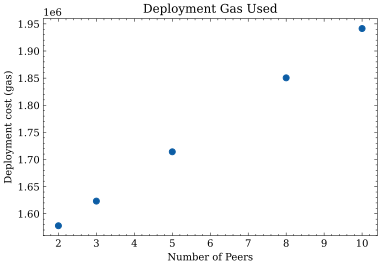

In [50]:
plt.scatter(df["peers_num"], df["deployment_gas_used"])
plt.title("Deployment Gas Used")
plt.xlabel('Number of Peers')
plt.ylabel('Deployment cost (gas)')
plt.savefig('deployment_gas_used.svg')
plt.show()

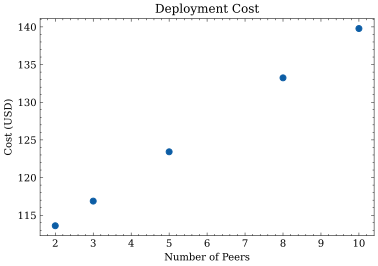

In [51]:
plt.scatter(df["peers_num"], df["deployment_cost"])
plt.title("Deployment Cost")
plt.xlabel('Number of Peers')
plt.ylabel('Cost (USD)')
plt.savefig('deployment_cost_pepers.svg')
plt.show()

In [40]:
gas = (1941417 - 1577845) / 8
print(gas)
esimate_gas_price((1941417 - 1577845) / 8)

45446.5


3.272148

In [38]:
(1941417 - 1577845) / 8

45446.5

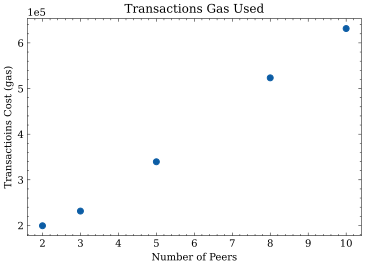

In [52]:
plt.scatter(df["peers_num"], df["changes_gas_used"] / (df["iterations"]))
plt.title("Transactions Gas Used")
plt.ticklabel_format(style='sci', axis='y', scilimits=(-3,4))
plt.xlabel('Number of Peers')
plt.ylabel('Transactioins Cost (gas)')
plt.savefig('transactions_gas_used.svg')
plt.show()

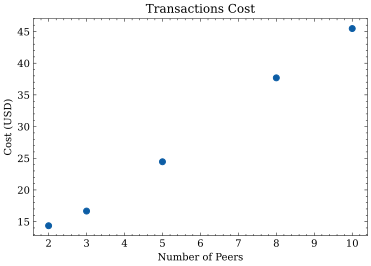

In [53]:
plt.scatter(df["peers_num"], df["changes_cost"] / df["iterations"])
plt.title("Transactions Cost")
plt.xlabel('Number of Peers')
plt.ylabel('Cost (USD)')
plt.savefig('transactions_cost.svg')
plt.show()

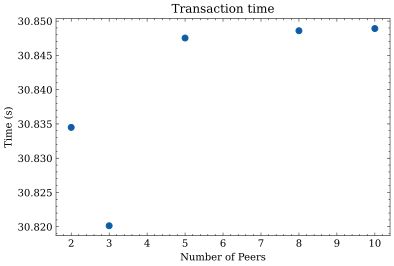

In [54]:
plt.scatter(df["peers_num"], df["changes_time"] / df["iterations"])
plt.title("Transaction time")
plt.xlabel('Number of Peers')
plt.ylabel('Time (s)')
plt.savefig('transactions_time.svg')
plt.show()

In [47]:
# Import pandas library
import pandas as pd

# initialize list of lists
data = [
    # baseline
    ['Deployment Cost', 1521598, estimate_gas_price(1521598)],
    ['proposePermissionGraphChange', 140658, estimate_gas_price(140658)],
    ['submitPeerVote', 27676, estimate_gas_price(27676)],
    ['submitPeerVote - final vote', 41336, estimate_gas_price(41336)],

    # after removing an additional mapping (d580833)
    ['Deployment Cost #1', 1434884, estimate_gas_price(1434884)],
    ['proposePermissionGraphChange #1', 138928, estimate_gas_price(138928)],
    ['submitPeerVote #1', 26502, estimate_gas_price(26502)],
    ['submitPeerVote - final vote #1', 40841, estimate_gas_price(40841)],

    # switching to modifiers instead of require statements inside function (1db0098)
    ['Deployment Cost #2', 1437084, estimate_gas_price(1437084)],
    ['proposePermissionGraphChange #2', 138928, estimate_gas_price(138928)],
    ['submitPeerVote #2', 26502, estimate_gas_price(26502)],
    ['submitPeerVote - final vote #2', 40841, estimate_gas_price(40841)],

    # checking strings using plain for loop - each proposition should have commit sha. (de81bb5)
    ['Deployment Cost #3', 1464511, estimate_gas_price(1464511)],
    ['proposePermissionGraphChange #3', 138928, estimate_gas_price(138928)],
    ['submitPeerVote #3', 33578, estimate_gas_price(33578)],
    ['submitPeerVote - final vote #3', 46501, estimate_gas_price(46501)],

    # removing error messages (a59a15c)
    ['Deployment Cost #4', 1314357, estimate_gas_price(1314357)],
    ['proposePermissionGraphChange #4', 138928, estimate_gas_price(138928)],
    ['submitPeerVote #4', 26502, estimate_gas_price(26502)],
    ['submitPeerVote - final vote #4', 40841, estimate_gas_price(40841)]
]

data = [
    ['baseline', 1521598, 140658, 27676, 41336],
    ['mapping removal', 1434884, 138928, 26502, 40841],
    ['modifiers', 1437084, 138928, 26502, 40841],
    ['string char by char comparison', 1464511, 138928, 33578, 46501],
    ['no error messages', 1314357, 138928, 26502, 46501]
]

# though removing mapping from smart contract
# makes it so that the more peers there are the longer it takes to check which one is part of the smart contract

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Benchmark', 'Deployment', 'proposePermissionGraphChange', 'submitPeerVote', 'submitPeerVote - final vote'])

# print dataframe.
df

,Benchmark,Deployment,proposePermissionGraphChange,submitPeerVote,submitPeerVote - final vote
0,baseline,1521598,140658,27676,41336
1,mapping removal,1434884,138928,26502,40841
2,modifiers,1437084,138928,26502,40841
3,string char by char comparison,1464511,138928,33578,46501
4,no error messages,1314357,138928,26502,46501


In [43]:
x = df.to_latex(escape=False)
print(x)

\begin{tabular}{llrrrr}
\toprule
{} &                       Benchmark &  Deployment &  proposePermissionGraphChange &  submitPeerVote &  submitPeerVote - final vote \\
\midrule
0 &                        baseline &     1521598 &                        140658 &           27676 &                        41336 \\
1 &                 mapping removal &     1434884 &                        138928 &           26502 &                        40841 \\
2 &                       modifiers &     1437084 &                        138928 &           26502 &                        40841 \\
3 &  string char by char comparison &     1464511 &                        138928 &           33578 &                        46501 \\
4 &               no error messages &     1314357 &                        138928 &           26502 &                        40841 \\
\bottomrule
\end{tabular}



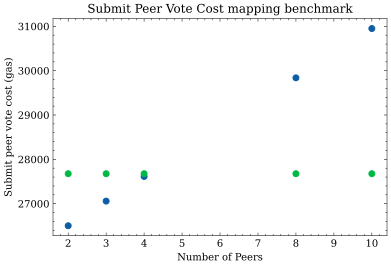

In [56]:
# as the number of peers increases, submit peer vote cost increases. instead of being constant.
peers_num = [2, 3, 4, 8, 10]
submit_peer_vote_cost = [26502, 27058, 27614, 29838, 30950]
submit_peer_vote_cost_with_mapping = [27676, 27676, 27676, 27676, 27676]

plt.scatter(peers_num, submit_peer_vote_cost)
plt.scatter(peers_num, submit_peer_vote_cost_with_mapping)
plt.title("Submit Peer Vote Cost mapping benchmark")
plt.xlabel('Number of Peers')
plt.ylabel('Submit peer vote cost (gas)')
plt.savefig('submit_peer_vote_cost.svg')
plt.show()

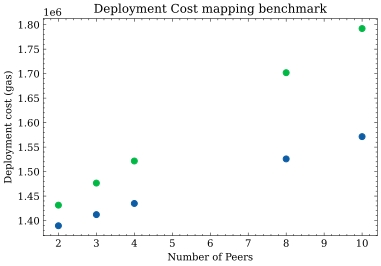

In [55]:
peers_num = [2, 3, 4, 8, 10]
deployment_cost_with_mapping = [1431444, 1476521, 1521598, 1701906, 1792060]
deployment_cost_without_mapping = [1389390, 1412137, 1434884, 1525872, 1571366]

plt.scatter(peers_num, deployment_cost_without_mapping)
plt.scatter(peers_num, deployment_cost_with_mapping)
plt.title("Deployment Cost mapping benchmark")
plt.xlabel('Number of Peers')
plt.ylabel('Deployment cost (gas)')
plt.savefig('submit_peer_vote_deployment_cost.svg')
plt.show()

In [20]:
estimate_gas_price(1792060)

129.02832

In [22]:
estimate_gas_price(500)

0.036000000000000004

In [ ]:
# 1. Smart contract deployment - this happens for every peerset - 100$

# 2. Peer proposes a change
#  -> single blockchain transaction (10$)

# 3. each peer votes for a change (num_peers x


# compare smart contract execution to empty smart contract
# (a simple counter?)

# distinguish between costs of various operations:
# - single vote
# - vote determining status of voting round


# look at historical stats to estimate how much time it takes to include a transaction
# skip ifps in time estimation, focus on ethereum.

# state of the art: compare cost of our smart contract to other smart contracts.

# Friday 14:00


# does changing variable names affect the cost?


In [ ]:
# Before optimisations:

# ❯ forge test --match-contract "PeerSetBenchmarkTest" --match-test "testBenchmarkSuccessfulGraphChange" --gas-report
# [⠰] Compiling...
# [⠒] Compiling 4 files with 0.8.17
# [⠢] Solc 0.8.17 finished in 1.69s
# Compiler run successful
# 2023-05-07T08:21:19.321158Z  INFO contract{name=test/PeerSetBenchmark.t.sol:PeerSetBenchmarkTest}: forge::runner: starting tests
# 2023-05-07T08:21:19.322311Z  INFO contract{name=test/PeerSetBenchmark.t.sol:PeerSetBenchmarkTest}: forge::runner: done. 1/1 successful duration=1.13348ms
#
# Running 1 test for test/PeerSetBenchmark.t.sol:PeerSetBenchmarkTest
# [PASS] testBenchmarkSuccessfulGraphChange() (gas: 199183)
# Test result: ok. 1 passed; 0 failed; finished in 1.13ms
# | src/peer-set/PeerSetSmartContract.sol:PeerSetSmartContract contract |                 |        |        |        |         |
# |---------------------------------------------------------------------|-----------------|--------|--------|--------|---------|
# | Deployment Cost                                                     | Deployment Size |        |        |        |         |
# | 1521598                                                             | 7653            |        |        |        |         |
# | Function Name                                                       | min             | avg    | median | max    | # calls |
# | currentPeerSetPermissionGraphIPFSPointer                            | 1244            | 1244   | 1244   | 1244   | 1       |
# | proposePermissionGraphChange                                        | 140658          | 140658 | 140658 | 140658 | 1       |
# | submitPeerVote                                                      | 27676           | 34506  | 34506  | 41336  | 2       |



In [ ]:
# After optimisations:

# - removed repeated require statements and replaced with modifiers
# - removed map lookups in favour of iterating over array

# ❯ forge test --match-contract "PeerSetBenchmarkTest" --match-test "testBenchmarkSuccessfulGraphChange" --gas-report
#
# [⠰] Compiling...
# No files changed, compilation skipped
# 2023-05-07T08:58:50.663450Z  INFO contract{name=test/PeerSetBenchmark.t.sol:PeerSetBenchmarkTest}: forge::runner: starting tests
# 2023-05-07T08:58:50.664615Z  INFO contract{name=test/PeerSetBenchmark.t.sol:PeerSetBenchmarkTest}: forge::runner: done. 1/1 successful duration=1.14254ms
#
# Running 1 test for test/PeerSetBenchmark.t.sol:PeerSetBenchmarkTest
# [PASS] testBenchmarkSuccessfulGraphChange() (gas: 195620)
# Test result: ok. 1 passed; 0 failed; finished in 1.14ms
# | src/peer-set/PeerSetSmartContract.sol:PeerSetSmartContract contract |                 |        |        |        |         |
# |---------------------------------------------------------------------|-----------------|--------|--------|--------|---------|
# | Deployment Cost                                                     | Deployment Size |        |        |        |         |
# | 1437084                                                             | 7588            |        |        |        |         |
# | Function Name                                                       | min             | avg    | median | max    | # calls |
# | currentPeerSetPermissionGraphIPFSPointer                            | 1199            | 1199   | 1199   | 1199   | 1       |
# | proposePermissionGraphChange                                        | 138933          | 138933 | 138933 | 138933 | 1       |
# | submitPeerVote                                                      | 26502           | 33671  | 33671  | 40840  | 2       |
#




In [ ]:
# String comparison with a for loop

# ❯ forge test --match-contract "PeerSetBenchmarkTest" --match-test "testBenchmarkSuccessfulGraphChange" --gas-report \
#  \
# [⠰] Compiling...
# No files changed, compilation skipped
# 2023-05-07T09:45:38.168131Z  INFO contract{name=test/PeerSetBenchmark.t.sol:PeerSetBenchmarkTest}: forge::runner: starting tests
# 2023-05-07T09:45:38.169427Z  INFO contract{name=test/PeerSetBenchmark.t.sol:PeerSetBenchmarkTest}: forge::runner: done. 1/1 successful duration=1.273808ms
#
# Running 1 test for test/PeerSetBenchmark.t.sol:PeerSetBenchmarkTest
# [PASS] testBenchmarkSuccessfulGraphChange() (gas: 209772)
# Test result: ok. 1 passed; 0 failed; finished in 1.27ms
# | src/peer-set/PeerSetSmartContract.sol:PeerSetSmartContract contract |                 |        |        |        |         |
# |---------------------------------------------------------------------|-----------------|--------|--------|--------|---------|
# | Deployment Cost                                                     | Deployment Size |        |        |        |         |
# | 1464511                                                             | 7725            |        |        |        |         |
# | Function Name                                                       | min             | avg    | median | max    | # calls |
# | currentPeerSetPermissionGraphIPFSPointer                            | 1199            | 1199   | 1199   | 1199   | 1       |
# | proposePermissionGraphChange                                        | 138933          | 138933 | 138933 | 138933 | 1       |
# | submitPeerVote                                                      | 33578           | 40039  | 40039  | 46501  | 2       |
#
#
